In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())
df.describe()

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [84]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [85]:
#Drop unnamed column
df = df.drop("Unnamed: 0",axis = 1) 
#axis = 1 means deleting the vertical axis

In [99]:
df.isnull().sum()
#Shows how many null values are there 

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [100]:
#change weakly study hours column i.e data transformation
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5 - 10","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


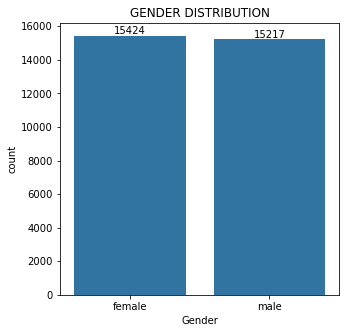

In [101]:
# GENDER DISTRIBUTION
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df , x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("GENDER DISTRIBUTION")
plt.show()

In [88]:
#From the above chart we have analysed that : Number of females in the data is more than
# the number of males

In [89]:
#Grouping by parent education
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


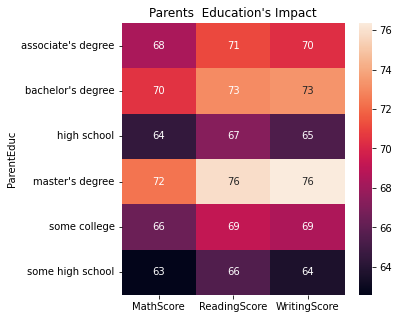

In [90]:
plt.figure(figsize = (5,5))
sns.heatmap(gb , annot = True)
plt.title("Parents  Education's Impact")
plt.show()

In [91]:
# From the above chart we can conclude that the education of parents
# a good impact on students scores

In [92]:
#Grouping by Parent marital status
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


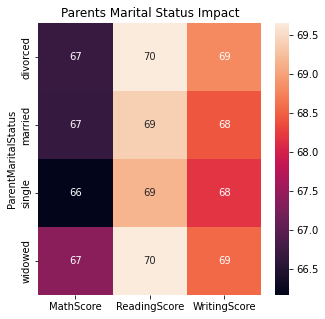

In [93]:
plt.figure(figsize = (5,5))
sns.heatmap(gb1 , annot = True)
plt.title("Parents Marital Status Impact")
plt.show()

In [94]:
# From the above chart we can conclude that Parent Marital Status has 
# no or negligible impact on student's score

In [95]:
#Distributions of Ethnic Groups
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


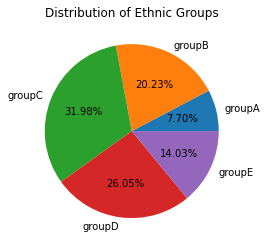

In [96]:
#Using 'loc' function of pandas library
groupA = df.loc[(df["EthnicGroup"] == 'group A')].count()
groupB = df.loc[(df["EthnicGroup"] == 'group B')].count()
groupC = df.loc[(df["EthnicGroup"] == 'group C')].count()
groupD = df.loc[(df["EthnicGroup"] == 'group D')].count()
groupE = df.loc[(df["EthnicGroup"] == 'group E')].count()

l = ["groupA" , "groupB" , "groupC" , "groupD" ,"groupE"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist , labels = l , autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

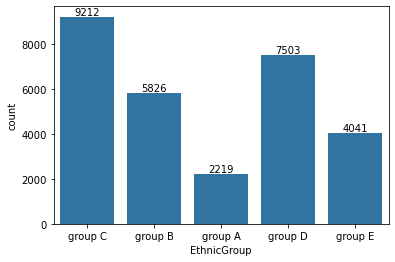

In [98]:
ax = sns.countplot(data = df ,x = 'EthnicGroup')
ax.bar_label(ax.containers[0])

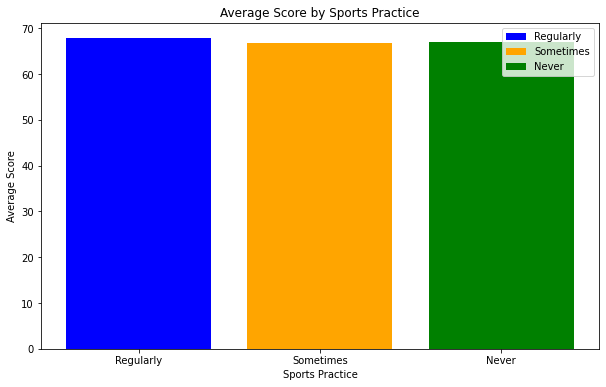

In [109]:
SportReg = df.groupby(df["PracticeSport"] == "regularly")
SportSome = df.groupby(df["PracticeSport"] == "sometimes")
SportNever = df.groupby(df["PracticeSport"] == "never")

# Plotting the bar chart of math scores for each group
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar("Regularly", SportReg["MathScore"].mean(), label="Regularly", color="blue")
plt.bar("Sometimes", SportSome["MathScore"].mean(), label="Sometimes", color="orange")
plt.bar("Never", SportNever["MathScore"].mean(), label="Never", color="green")

# Adding labels and title
plt.xlabel("Sports Practice")
plt.ylabel("Average Score")
plt.title("Average Score by Sports Practice")
plt.legend()
plt.show()